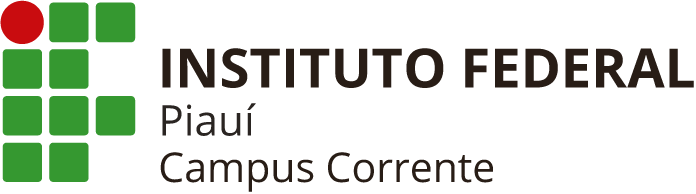


### Aula 4 - Preparação dos Dados - INTELIGÊNCIA ARTIFICIAL  ###
**Instituto Federal do Piauí - Campus Corrente**  
**Disciplina:** Inteligência Artificial  
**Professor:** Igor Bezerra Reis  
**Data:** 10 de abril de 2025


Neste notebook, vamos abordar as etapas iniciais de um pipeline de Machine Learning utilizando o conjunto de dados *Titanic*. Vamos explorar os dados, identificar problemas como valores ausentes, e aplicar técnicas de pré-processamento para preparar os dados para o treinamento de modelos.

**Importações das Bibliotecas**

In [29]:
!pip uninstall pandas-profiling -y
!pip install ydata-profiling

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Carregando o dataset Titanic

Antes de partir para a exploração dos dados é importante sabermos o que contém no dataset:

**pclass:** Classe do passageiro (1 = primeira, 2 = segunda, 3 = terceira)

**survived:** sobreviveu (0 = não, 1 = sim)

**name:** Nome do passageiro

**sex**: Sexo do passageiro

**age**: Idade do passageiro

**sibsp**: Número de irmãos/esposa(o) a bordo com o passageiro

**parch**: Número de pais/filhos a bordo com o passageiro

**ticket**: Número da passagem

**fare**: Preço da passagem

**cabin**: cabine

**embarked**:  C = Cherbourg, Q = Queenstown, S = Southamption


In [74]:
titanic_df = pd.read_csv("/content/titanic.csv", sep=",")
original_df = titanic_df
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Verificando estrutura e informações iniciais

In [75]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [77]:
from pandas_profiling import ProfileReport

profile = ProfileReport(titanic_df, title='Titanic', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## Verificando valores ausentes

In [78]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Seleção de colunas relevantes para o modelo

In [80]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
titanic_df = titanic_df.drop(columns=[
    "Name",
    "Ticket",
    "Cabin",
    "PassengerId"
])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Separação entre features e variável alvo

In [82]:
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']

### Tratando dados ausentes

In [83]:
# Imputação de valores faltantes para colunas numéricas
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

# Imputação para colunas categóricas
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

In [84]:
X.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## Aplicando LabelEncoder nas colunas categoricas

In [86]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
X['Sex'] = label.fit_transform(X['Sex'])

In [88]:
X['Embarked'] = label.fit_transform(X['Embarked'])

In [102]:
features_names = X.columns

In [89]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


## Dividindo os dados para treinamento e teste

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinando os modelos

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

### Regressão Logística

In [93]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred_log = logreg.predict(X_test)

print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Acurácia - Regressão Logística: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Árvore de Decisão

In [100]:
tree = DecisionTreeClassifier(max_depth=4)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [98]:
y_pred_tree = tree.predict(X_test)
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Acurácia - Árvore de Decisão: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



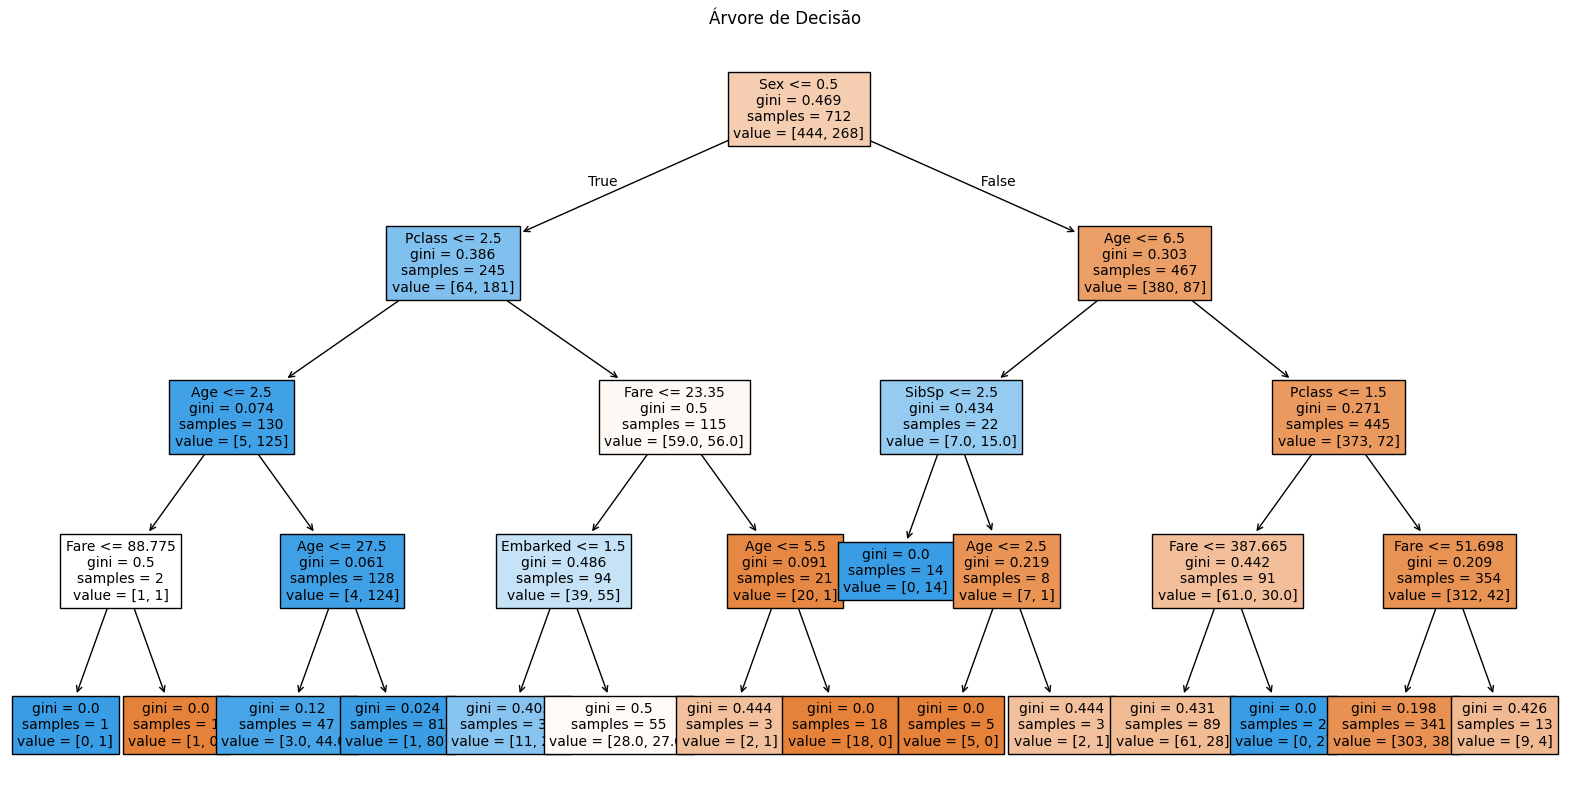

In [103]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Visualização da árvore
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features_names ,filled=True, fontsize=10)
plt.title("Árvore de Decisão")
plt.show()